In [1]:
%matplotlib inline
import os
import hs_utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap
import numpy as np
from osgeo import osr, gdal

In [2]:
# create a hydroshare intance
h = hs_utils.hydroshare()

In [3]:
# login to user account (will be replaced with OAUTH soon)
h.getSecureConnection(email = 'TonyCastronova')

Enter you HydroShare Password: ········
Successfully established a connection with HydroShare


In [98]:
# get some resource content. The resource content is returned as a dictionary
content = h.getResourceContent('1a43f21caa9941d6b79dd53565301175')

Download successful.
Content is located at: /home/jovyan/work/notebooks/data


In [99]:
# read the logan DEM using the gdal library  
ds = gdal.Open(content['logan.tif'])
band = ds.GetRasterBand(1)
elevation = band.ReadAsArray()

# set all negative values (i.e. nodata) to zero so that the map is displayed properly
elevation[elevation<0] = 0

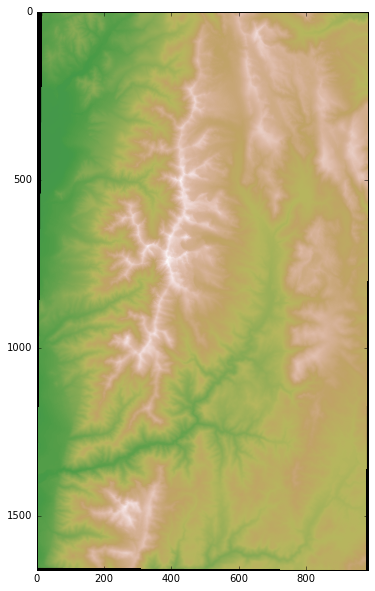

In [100]:
# create figure to hold plot (figsize=(width, height))
plt.figure(figsize=(10,10))
aspect = 1 # change the aspect ration to stretch or compress the image

# plot the DEM and display the results
plt.imshow(elevation, cmap='gist_earth', aspect=aspect)
plt.show()